## make_mockobs_forPieterandBob

Script that runs the making mock observations scripts and output is specifically given to Pieter and Bob/ my paper.

In [37]:
%run 'make_mockobs.ipynb'

In [3]:
machine='chinook'

In [4]:
resolution = None;  # This should prompt the script to just use the lowest resolution 

slicewidth = 20; 
exptime = 1000.*60.*60.; 
CMOS = True; ROnoise= None; 
x_center = 50.5; y_center = 13.5

****** Working on mock observation for distance 100Mpc ******
loading the data...
Resolution is None, finding minimum resolution of the similuation...
The resolution of the raw simulation at 100Mpc is 6.40094057981.
Loading data of slicewidth 20 (after rounding), number of slices is 4
./intermediatedata/data_100Mpc_6arcsec_20slwd.npz exists, loading now...
./intermediatedata/data_100Mpc_6arcsec_20slwd.npz was not saved as a tuple since too large, returning as tuple with 32000,1,6.40094057981 appended.
DEBUG: the resolution outputted from load_data is 6.40094057981
extracting the FOV...
making a mask for the data


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The current mask is [[-0.5609471201896667 -0.5673826336860657 -0.5707893371582031 ...,
  -1.6017686128616333 -1.5907478332519531 -1.580721139907837]
 [-0.5927731990814209 -0.6027000546455383 -0.6099472641944885 ...,
  -1.6161918640136719 -1.6040723323822021 -1.5926581621170044]
 [-0.6216232180595398 -0.6346660852432251 -0.6453272104263306 ...,
  -1.6309171915054321 -1.61774742603302 -1.6050255298614502]
 ..., 
 [-1.5873242616653442 -1.5931445360183716 -1.5988320112228394 ...,
  -2.086695671081543 -2.0889346599578857 -2.090973138809204]
 [-1.5847303867340088 -1.5903996229171753 -1.595850944519043 ...,
  -2.0886385440826416 -2.0909883975982666 -2.0931239128112793]
 [-1.5825705528259277 -1.5880998373031616 -1.593294382095337 ...,
  -2.0907442569732666 -2.093170166015625 -2.0953640937805176]]
adding noise to the data...
******* Adding noise to the input data to simulate a mock observation by the 48.0 lens Dragonfly Telescope *******
DEBUGGING: the binpix_size (resolution) is 6.40094057981


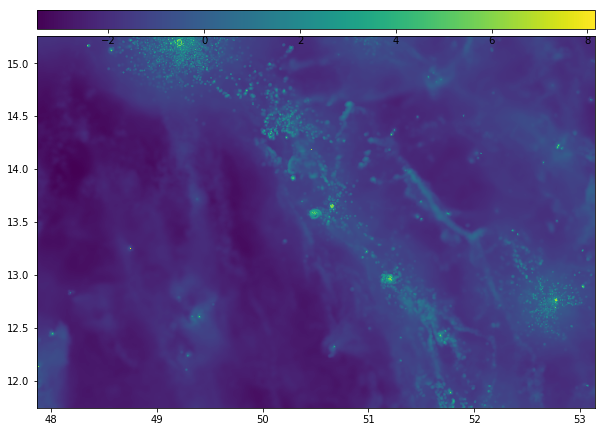

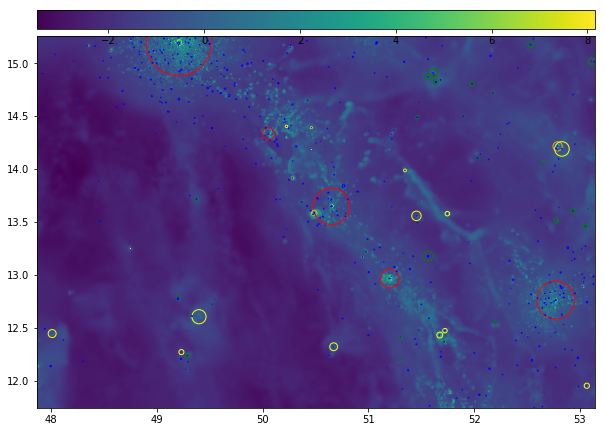

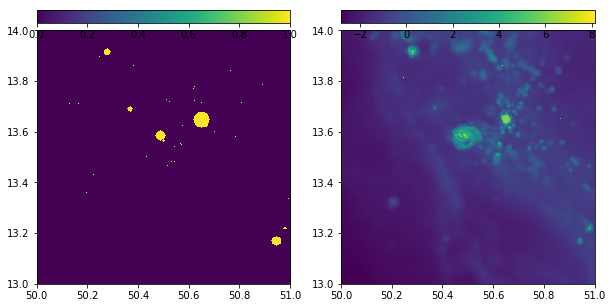

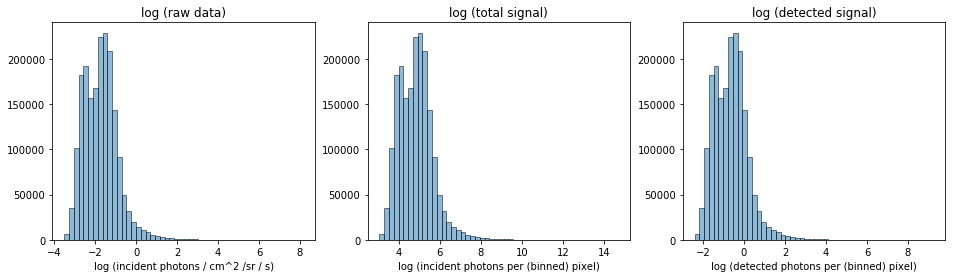

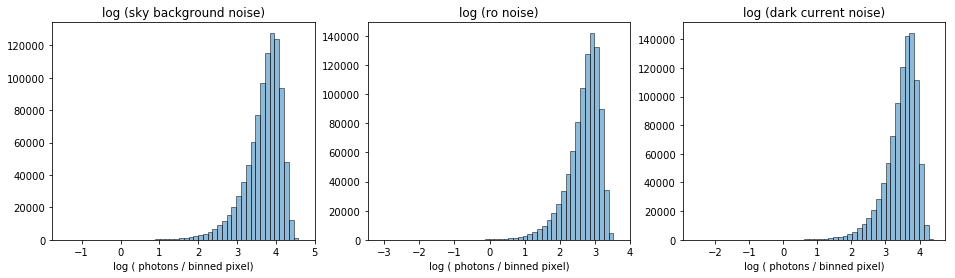

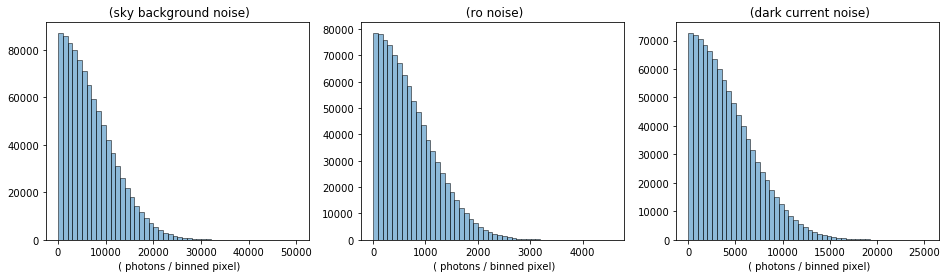

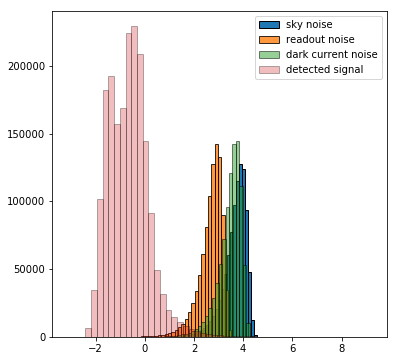

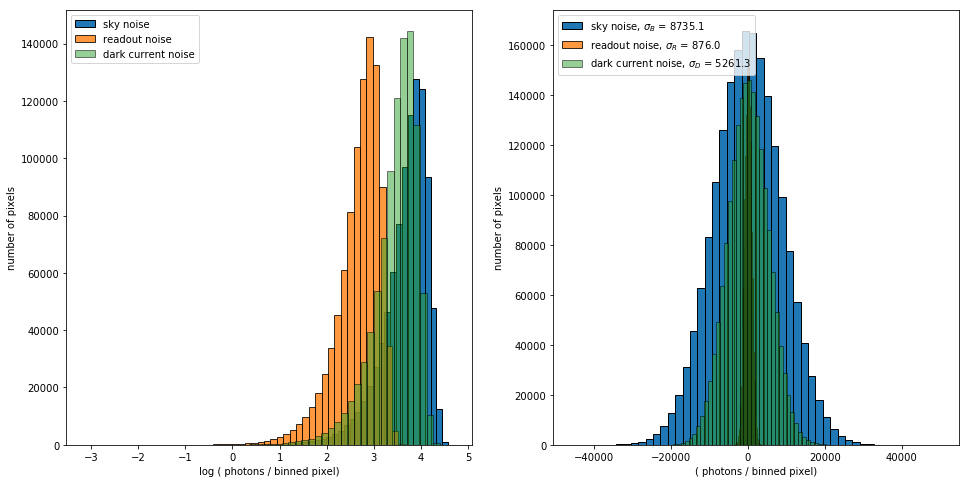

In [38]:
#distance = '500Mpc'
#data_FOV_500, xystarts_500, size_500, noiseadded_signal_500, B_sky_array_500, R_array_500,D_array500 = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,x_center=x_center,y_center=y_center)

#distance = '200Mpc'
#data_FOV_200, xystarts_200, size_200, noiseadded_signal_200, B_sky_array_200, R_array_200,D_array200 = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,x_center=x_center,y_center=y_center)

distance = '100Mpc'
data_FOV_100, xystarts_100, size_100, noiseadded_signal_100, B_sky_array_100, R_array_100,D_array100, mask = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,x_center=x_center,y_center=y_center,includemeannoise=True,mask=True,debug=True,plotchecks=True)

#distance = '50Mpc'
#data_FOV_50, xystarts_50, size_50, noiseadded_signal_50, B_sky_array_50, R_array_50,D_array50 = get_noisydata(resolution,distance,slicewidth,exptime,CMOS=CMOS,ROnoise=ROnoise,x_center=x_center,y_center=y_center)

(1688, 1124) (1688, 1124) (1688, 1124) (1688, 1124)


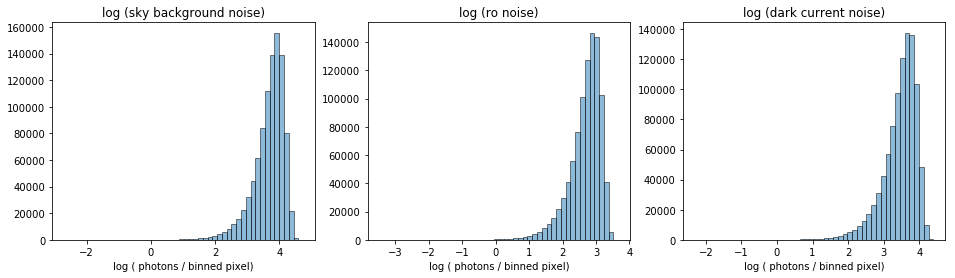

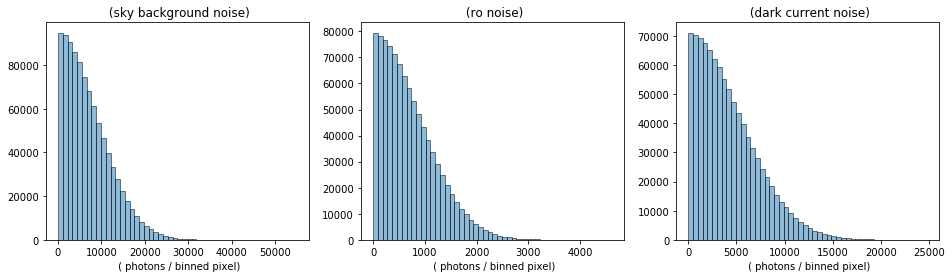

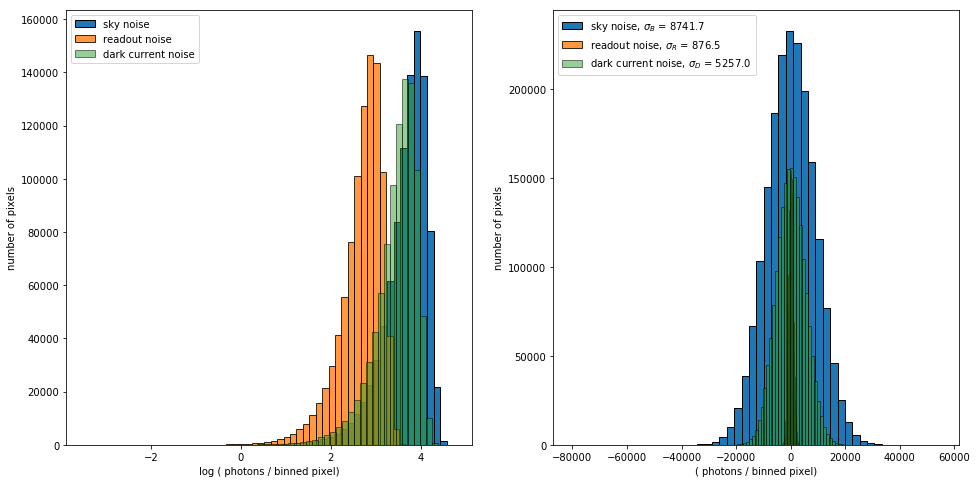

In [6]:
print data_FOV_100.shape, B_sky_array_100.shape, R_array_100.shape, D_array100.shape

plotchecks(B_sky_array_100, R_array_100, D_array100)

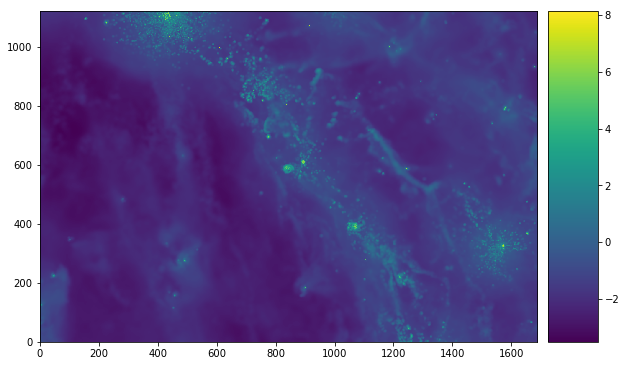

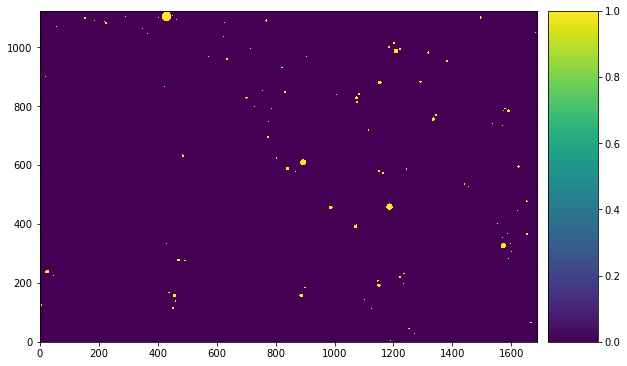

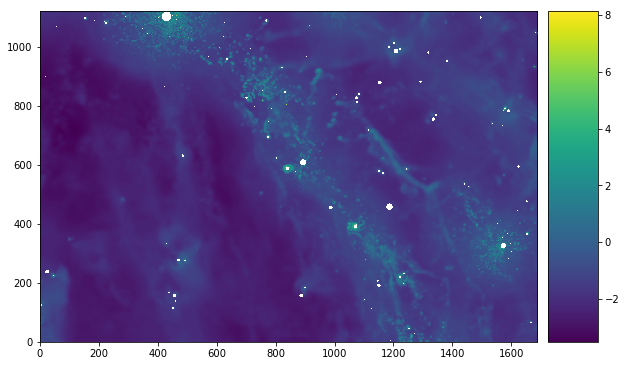

In [7]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(data_FOV_100.T,ax=ax1,colorbar=True)#,bounds=bounds)

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(mask.T,ax=ax1,colorbar=True)#,bounds=bounds)

mx = np.ma.masked_array(data_FOV_100, mask=mask)
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(mx.T,ax=ax1,colorbar=True)#,bounds=bounds)

plt.savefig('first_masked_FOV_forobservation.png')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


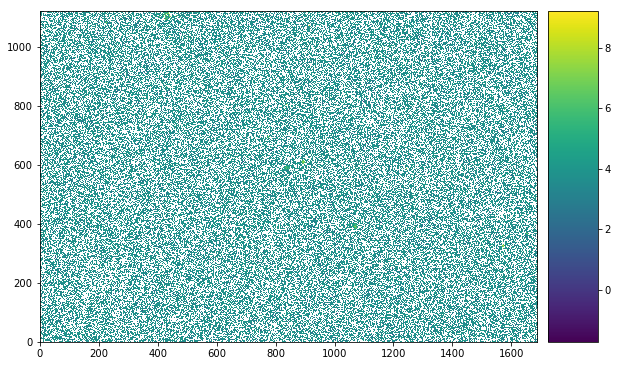

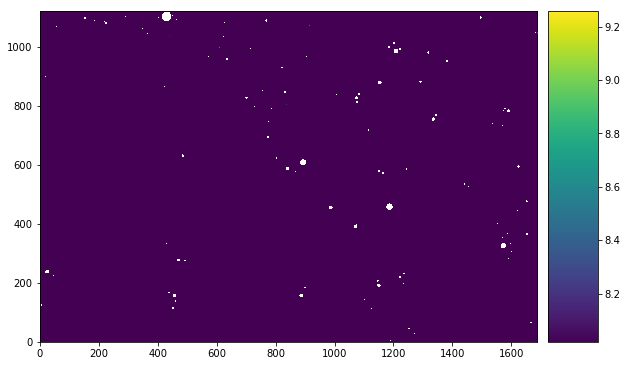

In [9]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(np.log10(noiseadded_signal_100-768000.0-27648000.0-76310797.0337).T,ax=ax1,colorbar=True)#,bounds=bounds)
# subtracted off the mean noise I added in - it is printed out above

mx_noisy = np.ma.masked_array(noiseadded_signal_100, mask=mask)
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(np.log10(mx_noisy).T,ax=ax1,colorbar=True)#,bounds=bounds)


In [10]:
noiseadded_signal_100.shape

(1688, 1124)

### upload the old data that I sent to Pieter and Bob ...
... it is slightly different because is half the resolution, but should look similar

In [11]:
from astropy.io import fits
olddata = fits.getdata('toPieterBob/noisy_fov_1000.0hr_newcam_100Mpcdist_14.0arcsec_20slwd_xycenter_50.5_13.5.fits')
olddata.shape

(843, 563)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


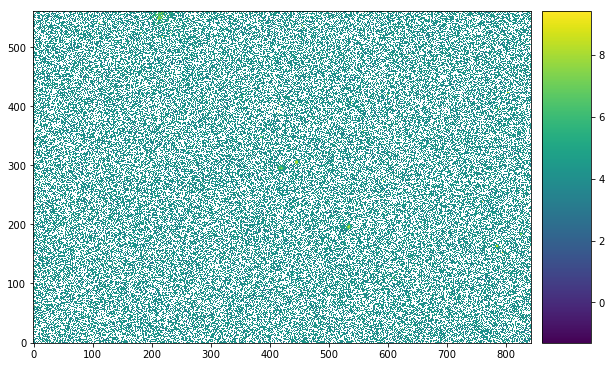

In [12]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(np.log10(olddata).T,ax=ax1,colorbar=True)#,bounds=bounds)

### They look similar! 
... Now, I can try binning the data.  First I will zoom in on the middle part and look at the mask applied to the data.

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in log10


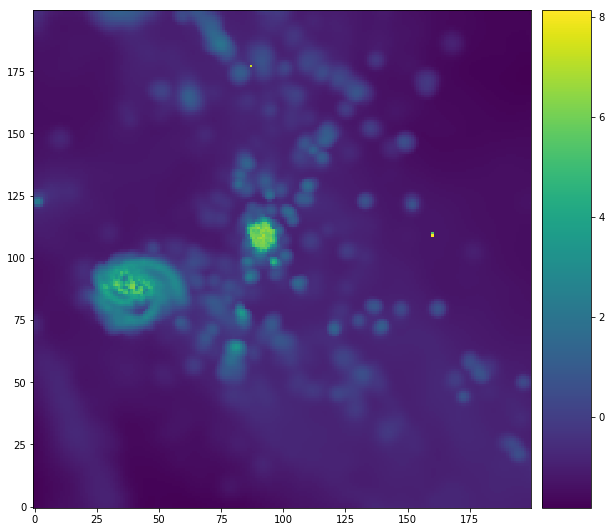

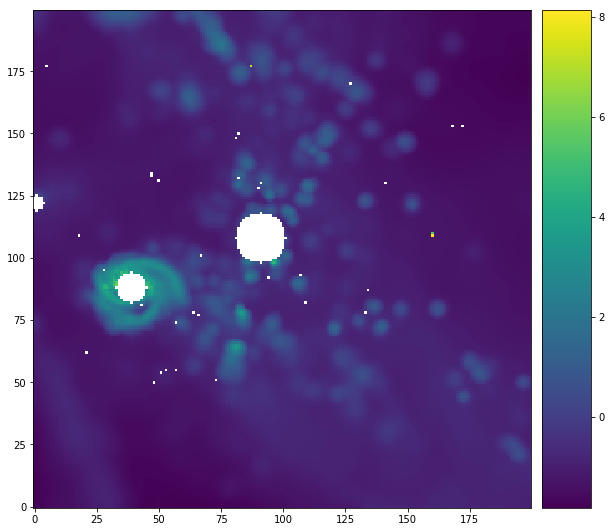

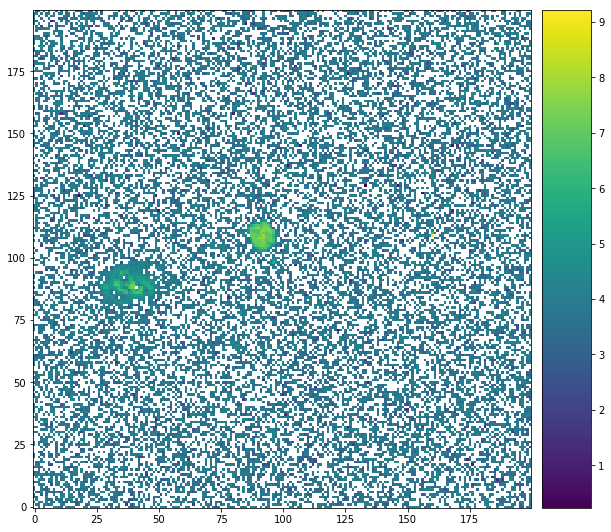

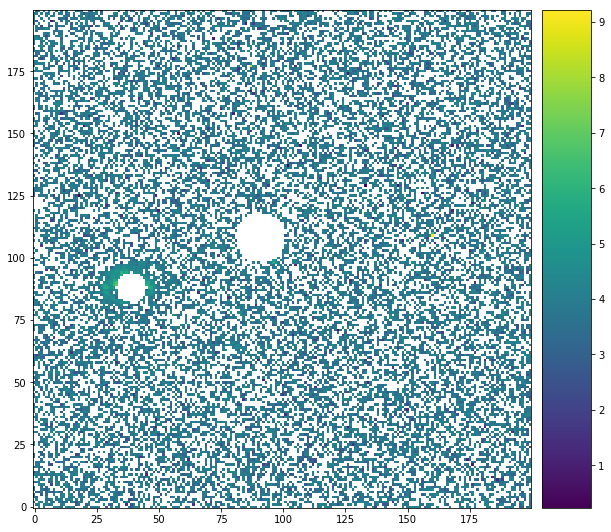

In [14]:
rawsim_cutout = data_FOV_100[800:1000,500:700]
rawsimmasked = np.ma.masked_array(data_FOV_100, mask=mask)
rawsimmasked_cutout = rawsimmasked[800:1000,500:700]

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(rawsim_cutout.T,ax=ax1,colorbar=True)#,bounds=bounds)

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(rawsimmasked_cutout.T,ax=ax1,colorbar=True)#,bounds=bounds)

noise_cutout = noiseadded_signal_100[800:1000,500:700]
mx_noisy = np.ma.masked_array(noiseadded_signal_100-768000.0-27648000.0-76310797.0337, mask=mask)
noisemasked_cutout = mx_noisy[800:1000,500:700]

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(np.log10(noise_cutout-768000.0-27648000.0-76310797.0337).T,ax=ax1,colorbar=True)#,bounds=bounds)
# subtracted off the mean noise I added in - it is printed out above

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(np.log10(noisemasked_cutout).T,ax=ax1,colorbar=True)#,bounds=bounds)


In [19]:
noisemasked_cutout.data.shape


(200, 200)

The smaller circle is about 30 - 40 kpc in diameter.

### Now I will bin the data a few times with the mask to show what the dealio is...

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in log10


Will set mask to False since masking is set to False.


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:35: RuntimeWarning: invalid value encountered in log10


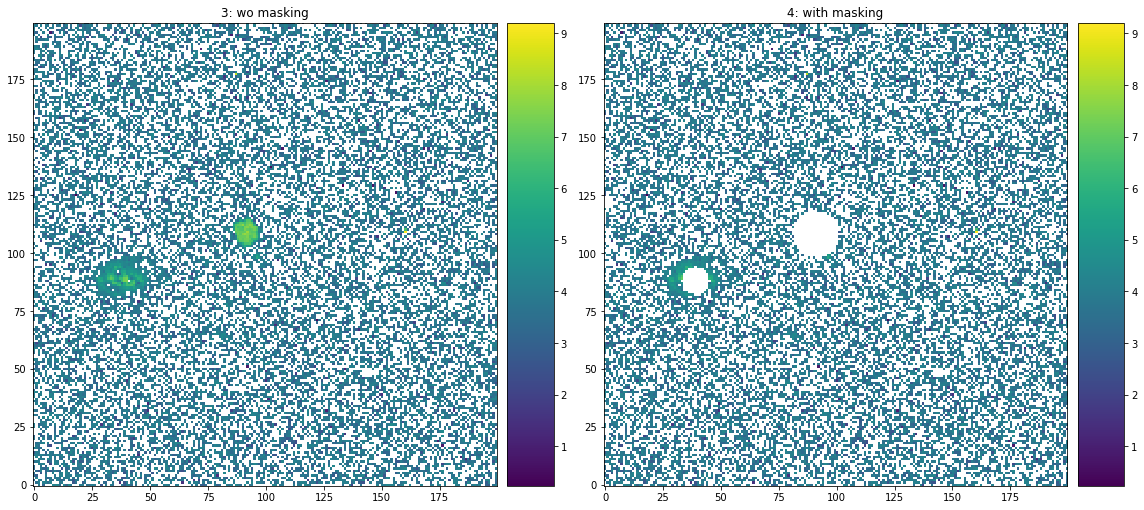

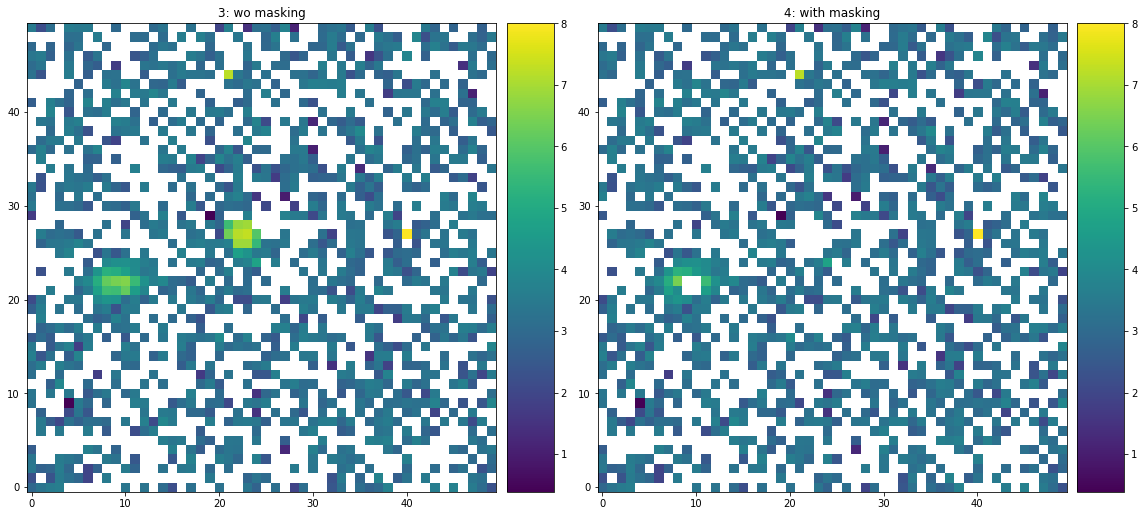

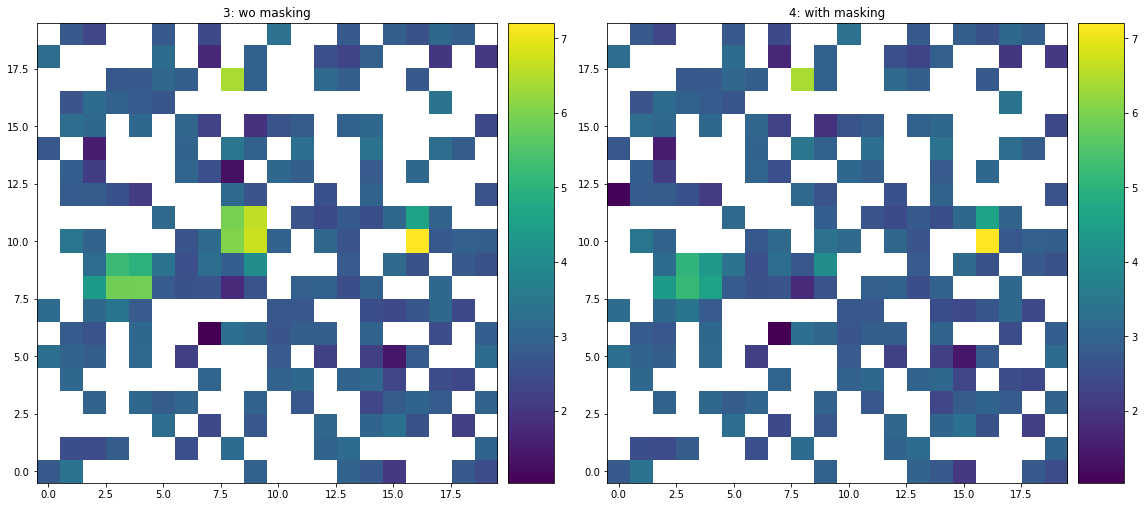

In [30]:
mx_noisy

factor = 1
# Plot the data (wo mask) and data (w mask)
lowres = get_halpha_SB.imreduce(noisemasked_cutout.data, factor, log=False, method = 'average') 
lowres_masked, mask, fillvalue = imreduce_masked(noisemasked_cutout.data,factor,mask=noisemasked_cutout.mask,log=False,fillby='min')

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
plotdata(np.log10(lowres).T,ax=ax1,colorbar=True)#,bounds=bounds)
ax1.set_title('3: wo masking')
plotdata(np.log10(lowres_masked).T,ax=ax2,colorbar=True)#,bounds=bounds)
ax2.set_title('4: with masking')
plt.tight_layout()

factor = 4
# Plot the data (wo mask) and data (w mask)
lowres = get_halpha_SB.imreduce(noisemasked_cutout.data, factor, log=False, method = 'average') 
lowres_masked, mask, fillvalue = imreduce_masked(noisemasked_cutout.data,factor,mask=noisemasked_cutout.mask,log=False,fillby='min')

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
plotdata(np.log10(lowres).T,ax=ax1,colorbar=True)#,bounds=bounds)
ax1.set_title('3: wo masking')
plotdata(np.log10(lowres_masked).T,ax=ax2,colorbar=True)#,bounds=bounds)
ax2.set_title('4: with masking')
plt.tight_layout()

factor = 10
# Plot the data (wo mask) and data (w mask)
lowres, mask_none, fillvalue_none = imreduce_masked(noisemasked_cutout.data, factor, log=False, masking=False) 
lowres_masked, mask, fillvalue = imreduce_masked(noisemasked_cutout.data,factor,mask=noisemasked_cutout.mask,log=False,fillby='min')

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
plotdata(np.log10(lowres).T,ax=ax1,colorbar=True)#,bounds=bounds)
ax1.set_title('3: wo masking')
plotdata(np.log10(lowres_masked).T,ax=ax2,colorbar=True)#,bounds=bounds)
ax2.set_title('4: with masking')
plt.tight_layout()

2817421.50761
Will set mask to False since masking is set to False.
Output grid must have a integer number of cells: trimming the array down to satisfy this.
Before reducing resolution, the original array was trimmed from size 1688,1124 to size 1680,1120.
Before reducing resolution, the original array was trimmed from size 1688,1124 to size 1680,1120.


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in log10


Output grid must have a integer number of cells: trimming the array down to satisfy this.
Before reducing resolution, the original array was trimmed from size 1688,1124 to size 1680,1120.
Before reducing resolution, the original array was trimmed from size 1688,1124 to size 1680,1120.


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in log10


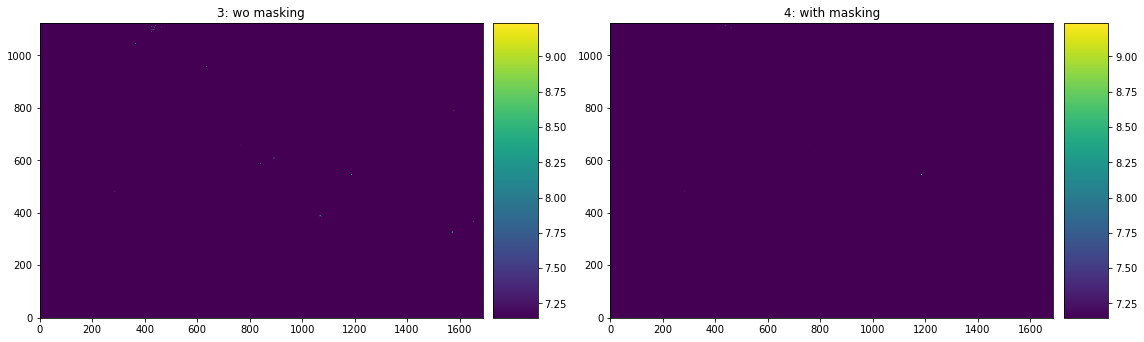

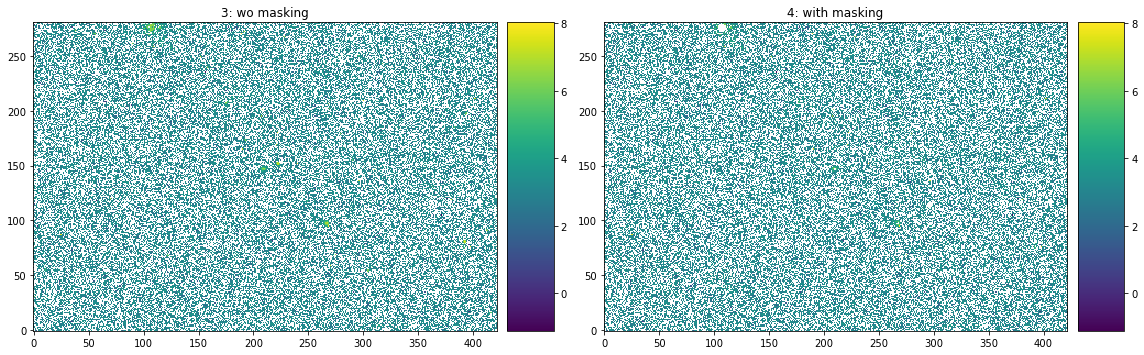

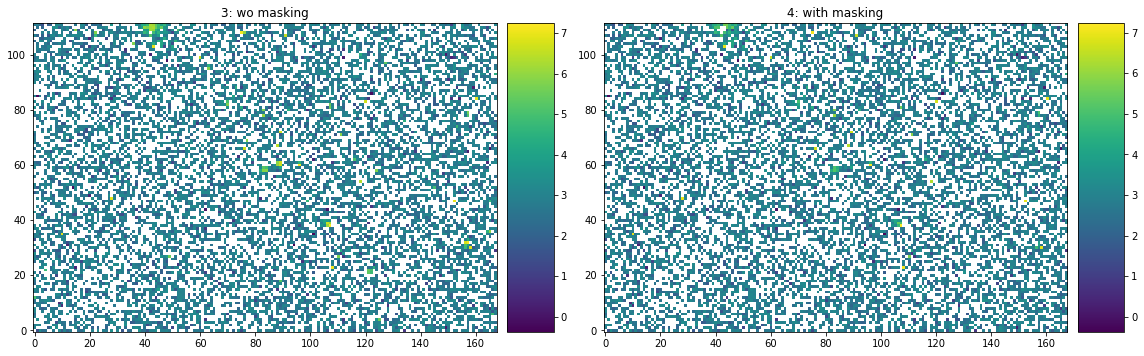

In [34]:
sigma = np.std(mx_noisy.data)
data = (mx_noisy.data+5*np.std(mx_noisy.data))
#data = mx_noisy.data
print sigma

factor = 1
# Plot the data (wo mask) and data (w mask)
lowres = get_halpha_SB.imreduce(data, factor, log=False, method = 'average') 
lowres_masked, mask, fillvalue = imreduce_masked(data,factor,mask=mx_noisy.mask,log=False,fillby='min')

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
plotdata(np.log10(lowres).T,ax=ax1,colorbar=True)#,bounds=bounds)
ax1.set_title('3: wo masking')
plotdata(np.log10(lowres_masked).T,ax=ax2,colorbar=True)#,bounds=bounds)
ax2.set_title('4: with masking')
plt.tight_layout()

factor = 4
# Plot the data (wo mask) and data (w mask)
lowres = get_halpha_SB.imreduce(mx_noisy.data, factor, log=False, method = 'average') 
lowres_masked, mask, fillvalue = imreduce_masked(mx_noisy.data,factor,mask=mx_noisy.mask,log=False,fillby='min')

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
plotdata(np.log10(lowres).T,ax=ax1,colorbar=True)#,bounds=bounds)
ax1.set_title('3: wo masking')
plotdata(np.log10(lowres_masked).T,ax=ax2,colorbar=True)#,bounds=bounds)
ax2.set_title('4: with masking')
plt.tight_layout()

factor = 10
# Plot the data (wo mask) and data (w mask)
lowres, mask_none, fillvalue_none = imreduce_masked(mx_noisy.data, factor, log=False, masking=False) 
lowres_masked, mask, fillvalue = imreduce_masked(mx_noisy.data,factor,mask=mx_noisy.mask,log=False,fillby='min')

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
plotdata(np.log10(lowres).T,ax=ax1,colorbar=True)#,bounds=bounds)
ax1.set_title('3: wo masking')
plotdata(np.log10(lowres_masked).T,ax=ax2,colorbar=True)#,bounds=bounds)
ax2.set_title('4: with masking')
plt.tight_layout()